# Taylor expansion

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import sympy
from sympy import *
from sympy.stats import *
import matplotlib.pyplot as plt
print("Using sympy version", sympy.__version__)
s_I0, s_xi, s_mu, s_sigma, s_amp, s_alpha = \
    symbols(r'I_0 \xi \mu \sigma A \alpha')

Using sympy version 1.3


In [3]:
def _I(N=10):
    """
    Return the Nth order approximation to the shifted
    spectrum as a SymPy expression. Here we are simply
    Taylor-expanding the spectrum at ``(xi - alpha)``.
    
    """
    # The rest frame line profile
    s_I0 = 1 - s_amp * exp(-Rational(1, 2) * (s_xi - s_mu) ** 2 / s_sigma ** 2)
    
    # The Taylor expansion for the higher order terms.
    # Note that the factor of ``(-1) ** n`` comes from
    # repeated application of the chain rule to get
    # ``dI / dalpha`` from ``dI / dxi``.
    SN = 0
    for n in range(1, N + 1):
        SN += (-1) ** n / factorial(n) * diff(s_I0, s_xi, n) * s_alpha ** n
    
    # Return
    return s_I0 + SN

In [4]:
def I(lam, alpha=0, mu=0.0, sigma=0.1, amp=1.0, N=10):
    """
    Return the shifted spectrum as a numpy array,
    computed using the Taylor expansion.
    
    """
    if alpha == 0:
        N = 0    
    args = (s_xi, s_mu, s_sigma, s_amp, s_alpha)
    return lambdify(args, _I(N=N), "numpy")(xi, mu, sigma, amp, alpha)

In [5]:
def I_num(xi, alpha=0, mu=0.0, sigma=0.1, amp=1.0, npts=1000):
    """
    Return the disk-integrated spectrum as a numpy array,
    computed numerically.
    
    """
    # The rest frame line profile
    I0 = 1 - amp * np.exp(-0.5 * (xi - mu) ** 2 / sigma ** 2)
    xi0 = xi - alpha
    return np.interp(xi0, xi, I0)

## Let's compute the shifted spectrum with an $N=10$ Taylor expansion

We'll assume a Gaussian absorption line and shift it by increasing values of $\beta$. Below, the dashed black curve is the rest frame spectrum, the blue curve is the true shifted spectrum (computed numerically) and the orange curve is the Taylor expansion of the shifted spectrum.

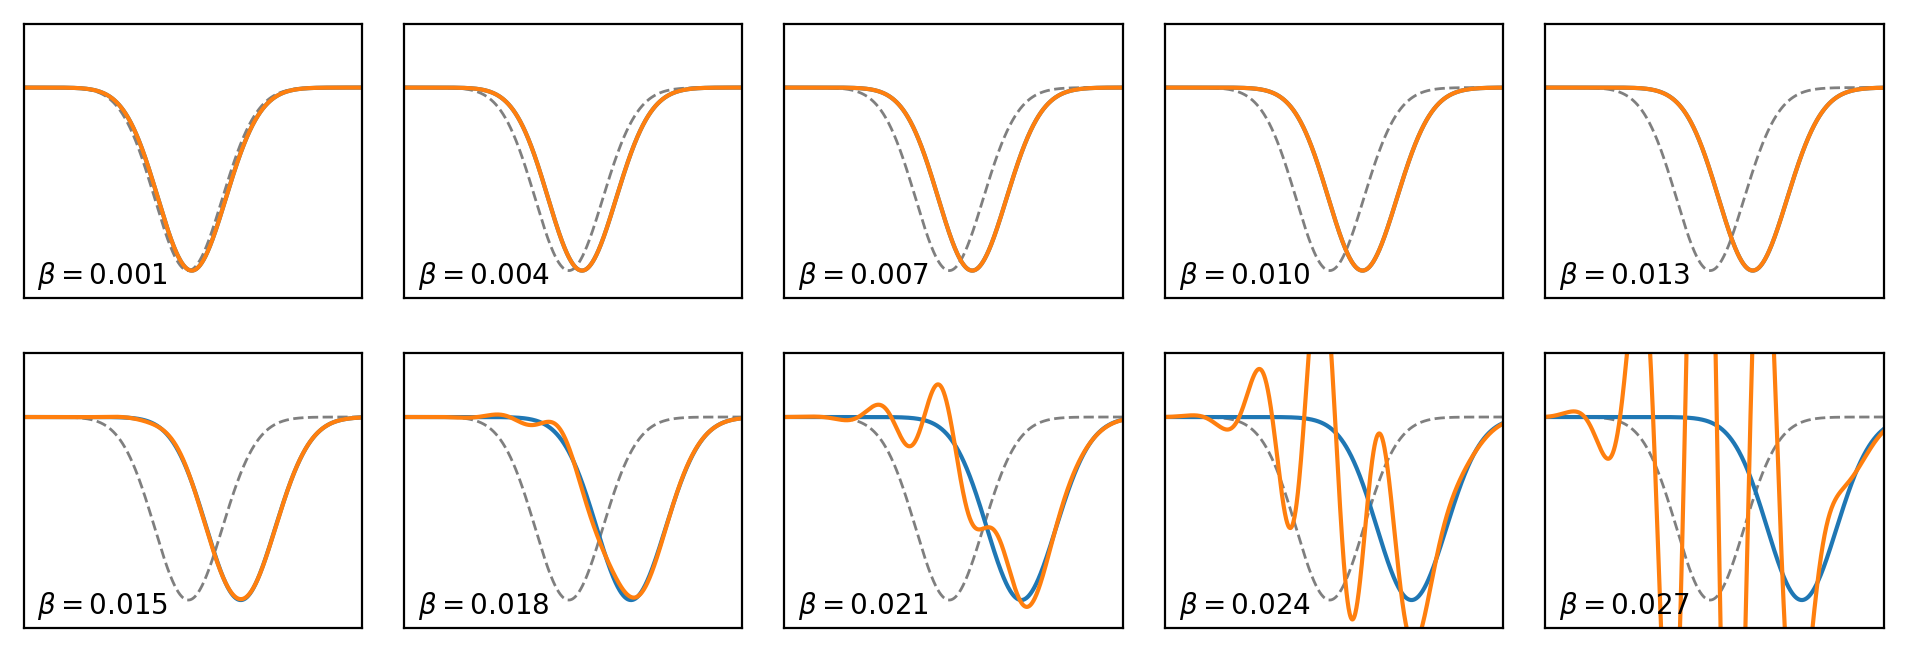

In [16]:
mu = 0.0
sigma = 0.01
npts = 1000
xi = np.linspace(mu - 5 * sigma, mu + 5 * sigma, npts)
lam = np.exp(xi)
I0 = I_num(xi, alpha=0, mu=mu, sigma=sigma)

beta = np.linspace(1e-3, 3e-2, 11)[:-1]
alpha = np.log(1 + beta)
fig, ax = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.125)
for i, axis in enumerate(ax.flatten()):
    axis.plot(lam, I0, color="k", alpha=0.5, ls="--", lw=1)
    axis.plot(lam, I_num(xi, alpha=alpha[i], mu=mu, 
                         sigma=sigma))
    axis.plot(lam, I(xi, alpha=alpha[i], mu=mu, sigma=sigma, N=10))
    axis.set_xticks([])
    axis.set_yticks([])
    axis.annotate(r"$\beta = {:.3f}$".format(beta[i]), 
                  xy=(0, 0), xycoords="axes fraction",
                  xytext=(5, 5), textcoords="offset points", fontsize=10)
    axis.margins(0, None)
    axis.set_ylim(-0.15, 1.35)

It is clear that even at tenth order, we cannot model large Doppler shifts by just Taylor expanding the Doppler operator!